### Calculating & Investigating final number density plot

[1.00144254 1.00144283 1.00144299 1.00144308 1.00144312 1.00144315
 1.00144316 1.00144316 1.00144317 1.00144317 1.00144317 1.00144317
 1.00144317 1.00144317 1.00144317 1.00144317 1.00144317 1.00144317
 1.00144317 1.00144317 1.00144316 1.00144316 1.00144316 1.00144316
 1.00144316 1.00144316 1.00144316 1.00144316 1.00144316 1.00144316
 1.00144315 1.00144315 1.00144315 1.00144315 1.00144315 1.00144314
 1.00144314 1.00144314 1.00144313 1.00144313 1.00144313 1.00144312
 1.00144311 1.00144311 1.0014431  1.00144309 1.00144309 1.00144308
 1.00144307 1.00144306 1.00144304 1.00144303 1.00144301 1.001443
 1.00144298 1.00144296 1.00144293 1.00144291 1.00144288 1.00144285
 1.00144281 1.00144277 1.00144273 1.00144268 1.00144263 1.00144257
 1.00144251 1.00144244 1.00144236 1.00144227 1.00144217 1.00144206
 1.00144194 1.00144181 1.00144166 1.0014415  1.00144132 1.00144112
 1.0014409  1.00144065 1.00144038 1.00144008 1.00143975 1.00143938
 1.00143897 1.00143851 1.00143801 1.00143745 1.00143684 1.001436

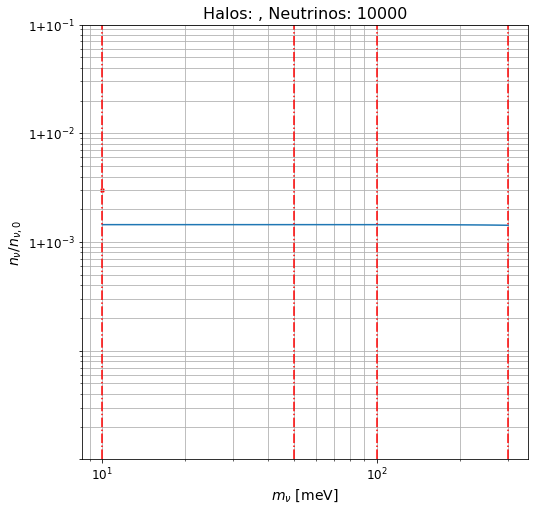

Max value: 1.0014431681125455 0.0014431681125455231


In [1]:
from shared.preface import *
import shared.functions as fct


# Load data.
nus = 10000
MW_HALO = False
AG_HALO = False
VC_HALO = False
halos = 'MW'*MW_HALO + '+VC'*VC_HALO + '+AG'*AG_HALO
u_all = fct.load_u_sim(nus, halos)

def number_density_1_mass(m_nu_eV, average=False):

    n_nus = np.zeros(len(m_nu_eV))
    for i, m_eV in enumerate(m_nu_eV):

        # Get momenta.
        p, _ = fct.u_to_p_eV(u_all, m_eV)

        if average and m_eV >= 0.1:
            # Calculate number density, values are averaged for z in [3.5, 4].
            idx = np.array(np.where(ZEDS >= 3.5)).flatten()

            temp = np.zeros(len(idx))
            for j,k in enumerate(idx):
                val = fct.number_density(p[:,0], p[:,k])
                temp[j] = val

            n_nus[i] = np.mean(temp)

        else:
            n_nus[i] = fct.number_density(p[:,0], p[:,-1])

    np.save(
        f'neutrino_data/clustering_factors_nus_{nus}_halos_{halos}.npy', 
        n_nus
        )


# 10 to 300 meV like in the paper.
mass_range_eV = np.geomspace(0.01, 0.3, 100)*eV

number_density_1_mass(mass_range_eV, average=False)
n_nus = np.load(
    f'neutrino_data/clustering_factors_nus_{nus}_halos_{halos}.npy'
    )/N0

# Plotting:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.plot(mass_range_eV*1e3, (n_nus-1))
x_ends = [1e1, 3*1e2]
y_ends = [3*1e-3, 4]
ax.scatter(x_ends, y_ends, s=12, marker='x', c='r')

for m in NU_MASSES:
    ax.axvline(m*1e3, c='r', ls='-.')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(f'Halos: {halos}, Neutrinos: {nus}')
ax.set_xlabel(r'$m_{\nu}$ [meV]')
ax.set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')
ax.set_ylim(1e-5, 1e-1)
plt.grid(True, which="both", ls="-")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fct.y_fmt))

plt.savefig(f'figures/clustering_factors_nus_{nus}_halos_{halos}.pdf')
plt.show()

print('Max value:', np.max(n_nus), np.max(n_nus-1))